# Task 1

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

## Reading data

In [2]:
df_customers = pd.read_csv('S_Data/customers.csv')
df_geolocation = pd.read_csv('S_Data/geolocation.csv')
df_order_items = pd.read_csv('S_Data/order_items.csv')
df_order_payments = pd.read_csv('S_Data/order_payments.csv')
df_order_reviews = pd.read_csv('S_Data/order_reviews.csv')
df_orders = pd.read_csv('S_Data/orders.csv')
df_products = pd.read_csv('S_Data/products.csv')
df_sellers = pd.read_csv('S_Data/sellers.csv')
df_product_category_name_translation = pd.read_csv('S_Data/product_category_name_translation.csv')

## Data exploration

### customers

In [3]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
df_customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [5]:
df_customers.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [6]:
df_customers.shape

(99441, 5)

### geolocation

In [7]:
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [8]:
df_geolocation.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [9]:
df_geolocation.shape

(1000163, 5)

### order_items

In [10]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [11]:
df_order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [12]:
df_order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [13]:
df_order_items.shape

(112650, 7)

### order_payments

In [14]:
df_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [15]:
df_order_payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [16]:
df_order_payments.shape

(103886, 5)

### orders

In [17]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [18]:
df_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [19]:
df_orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [20]:
df_orders.order_status.value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [21]:
df_orders.shape

(99441, 8)

### products

In [22]:
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [23]:
df_products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [24]:
df_products[df_products['product_category_name'].isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [25]:
df_products.shape

(32951, 9)

### sellers

In [26]:
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [27]:
df_sellers.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [28]:
df_sellers.shape

(3095, 4)

## Data preprocessing

In [29]:
#convert dates to datetime
df_order_items['shipping_limit_date'] = pd.to_datetime(df_order_items['shipping_limit_date'])
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])
df_orders['order_approved_at'] = pd.to_datetime(df_orders['order_approved_at'])
df_orders['order_delivered_carrier_date'] = pd.to_datetime(df_orders['order_delivered_carrier_date'])
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'])
df_orders['order_estimated_delivery_date'] = pd.to_datetime(df_orders['order_estimated_delivery_date'])


In [30]:
#create merged dataframe
data = pd.merge(df_orders, df_order_items, on='order_id')
data = pd.merge(data, df_products, on='product_id')
data = pd.merge(data, df_sellers, on='seller_id')
data = pd.merge(data, df_customers, on='customer_id')
data = pd.merge(data, df_order_payments, on='order_id')
data = pd.merge(data, df_order_reviews, on='order_id')

In [31]:
#drop columns that are not needed
data = data.drop(['customer_zip_code_prefix', 'seller_zip_code_prefix', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'customer_unique_id', 'customer_zip_code_prefix', 'seller_zip_code_prefix', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp'], axis=1)

In [32]:
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,seller_city,seller_state,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,maua,SP,sao paulo,SP,1,credit_card,1,18.12,a54f0611adc9ed256b57ede6b6eb5114,4
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,maua,SP,sao paulo,SP,3,voucher,1,2.00,a54f0611adc9ed256b57ede6b6eb5114,4
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,maua,SP,sao paulo,SP,2,voucher,1,18.59,a54f0611adc9ed256b57ede6b6eb5114,4
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,1,87285b34884572647811a353c7ac498a,...,maua,SP,sao paulo,SP,1,credit_card,3,37.77,b46f1e34512b0f4c74a72398b03ca788,4
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,1,87285b34884572647811a353c7ac498a,...,maua,SP,sao paulo,SP,1,credit_card,1,37.77,dc90f19c2806f1abba9e72ad3c350073,5


In [33]:
data.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1254
order_delivered_customer_date    2588
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name            1709
seller_city                         0
seller_state                        0
customer_city                       0
customer_state                      0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
review_id                           0
review_score                        0
dtype: int64

## Data visualization

C:\Users\Volplayed\AppData\Local\Temp\ipykernel_9396\1206437972.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


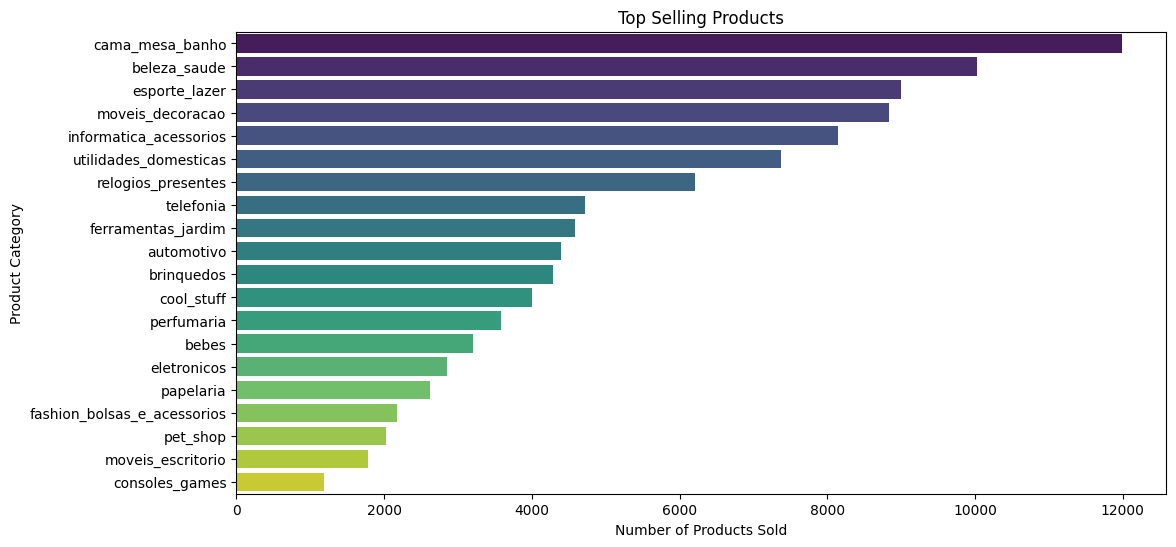

In [34]:
#top selling products bar chart
top_products = data['product_category_name'].value_counts().head(20)
plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top Selling Products')
plt.xlabel('Number of Products Sold')
plt.ylabel('Product Category')
plt.show()

C:\Users\Volplayed\AppData\Local\Temp\ipykernel_9396\3990611651.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products_revenue.values, y=top_products_revenue.index, palette='viridis')


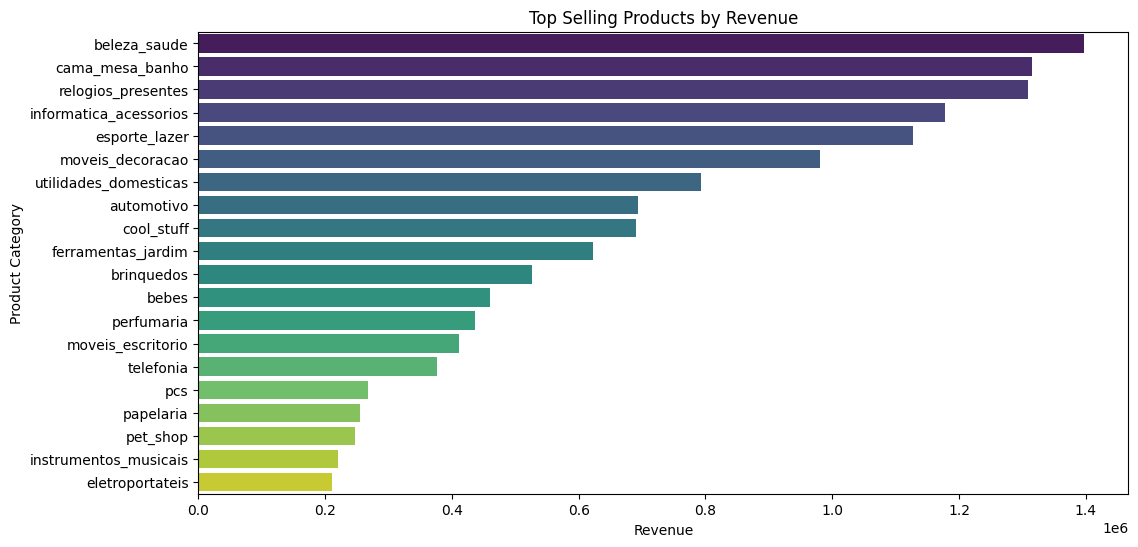

In [35]:
#top selling products by revenue
data['revenue'] = data['price'] * data['order_item_id']
top_products_revenue = data.groupby('product_category_name')['revenue'].sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(12,6))
sns.barplot(x=top_products_revenue.values, y=top_products_revenue.index, palette='viridis')
plt.title('Top Selling Products by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Product Category')
plt.show()

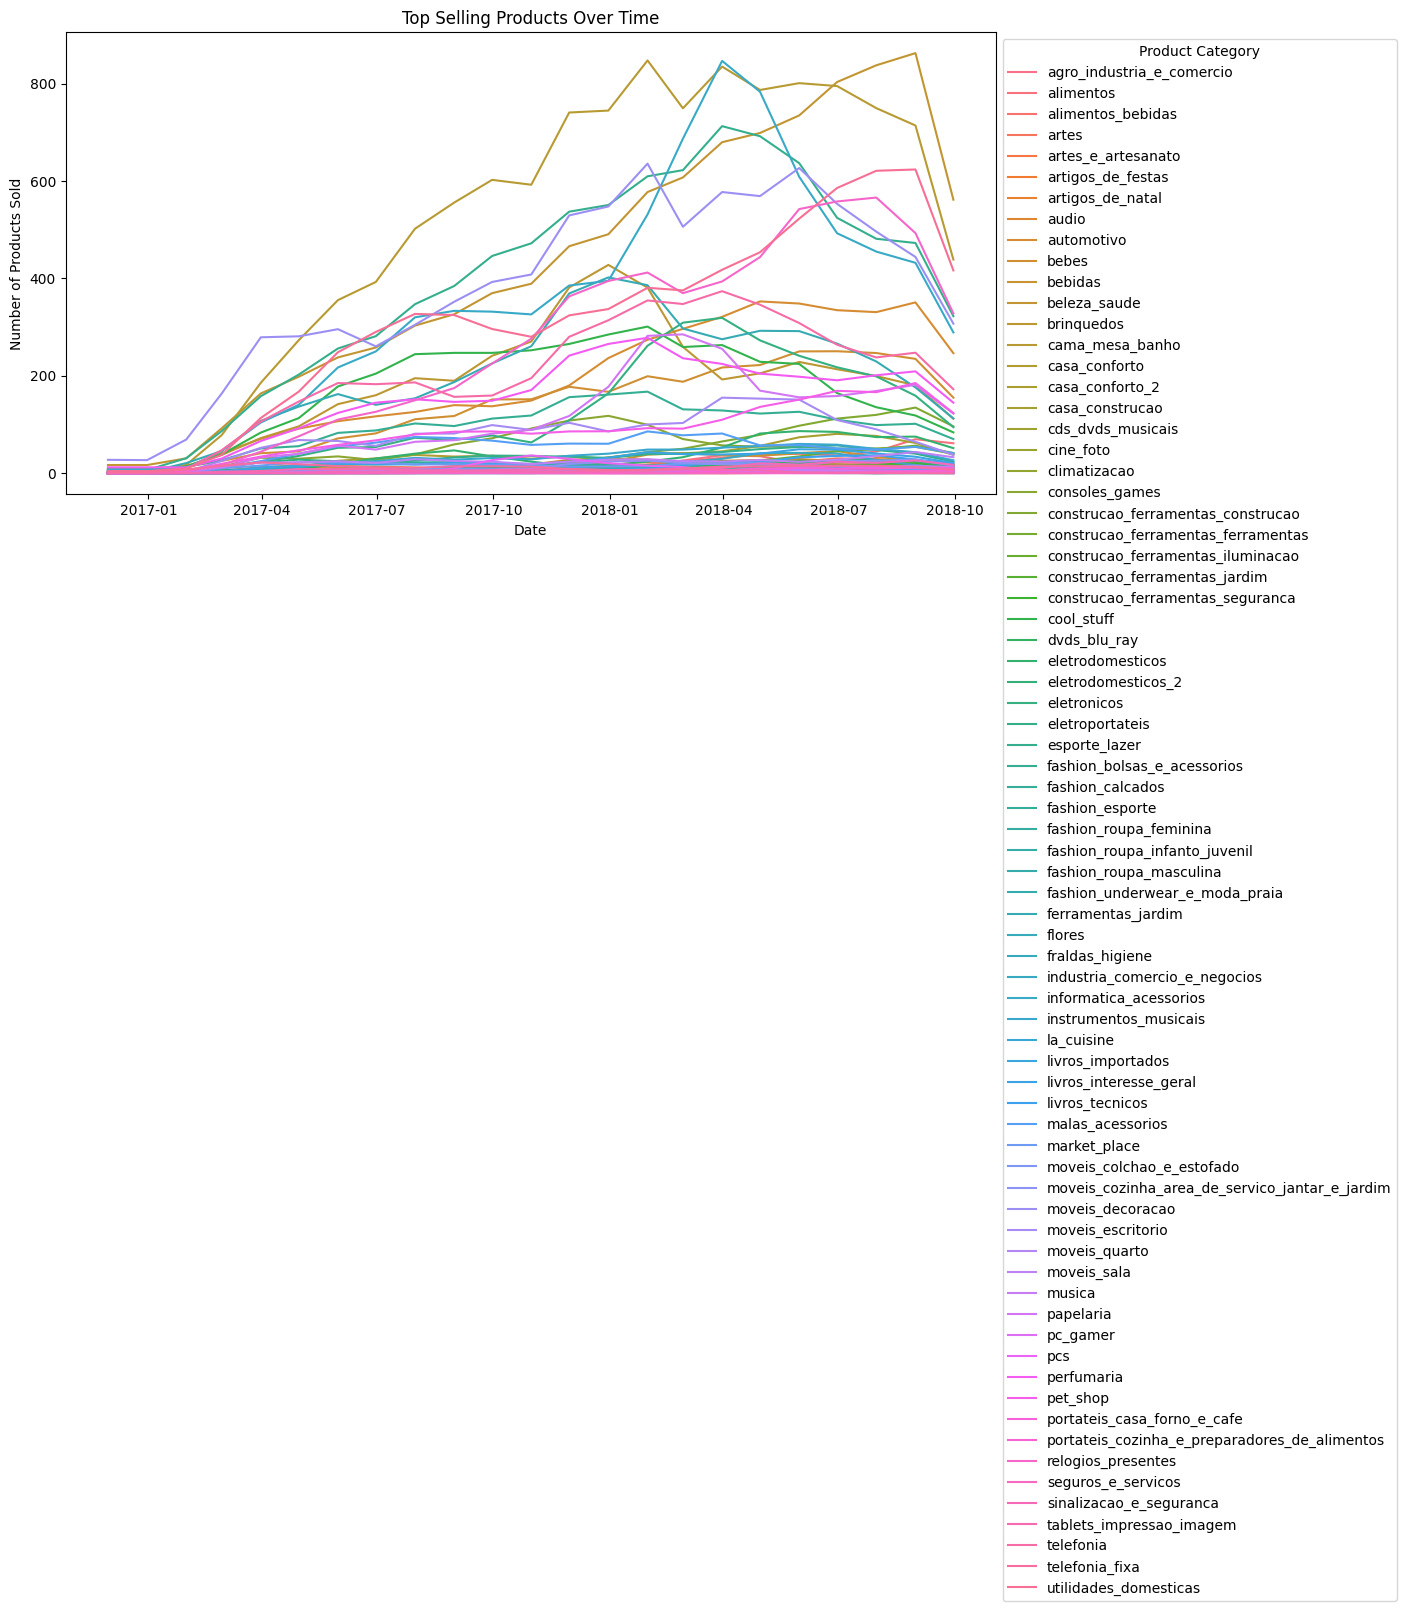

In [36]:
#top selling products by time
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])
data['order_purchase_date'] = data['order_purchase_timestamp'].dt.date
data['order_purchase_month'] = data['order_purchase_timestamp'].dt.to_period('M')
top_products_time = data.groupby('order_purchase_month')['product_category_name'].value_counts().unstack()
top_products_time.index = top_products_time.index.to_timestamp()
top_products_time = top_products_time.resample('M').sum().fillna(0)
top_products_time = top_products_time.rolling(3).mean()
plt.figure(figsize=(12,6))
sns.lineplot(data=top_products_time, dashes=False)
plt.title('Top Selling Products Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Products Sold')
plt.legend(title='Product Category', bbox_to_anchor=(1,1))
plt.show()


## Predictive models

### Classical model

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,payment_installments,payment_value,review_id,review_score,revenue,order_purchase_date,order_purchase_month,order_purchase_day,order_purchase_hour,order_purchase_weekday
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,1,18.12,a54f0611adc9ed256b57ede6b6eb5114,4,29.99,2017-10-02,2017-10,2017-10-02,10,0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,1,2.00,a54f0611adc9ed256b57ede6b6eb5114,4,29.99,2017-10-02,2017-10,2017-10-02,10,0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,1,18.59,a54f0611adc9ed256b57ede6b6eb5114,4,29.99,2017-10-02,2017-10,2017-10-02,10,0
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,1,87285b34884572647811a353c7ac498a,...,3,37.77,b46f1e34512b0f4c74a72398b03ca788,4,29.99,2017-08-15,2017-08,2017-08-15,18,1
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,1,87285b34884572647811a353c7ac498a,...,1,37.77,dc90f19c2806f1abba9e72ad3c350073,5,29.99,2017-08-02,2017-08,2017-08-02,18,2


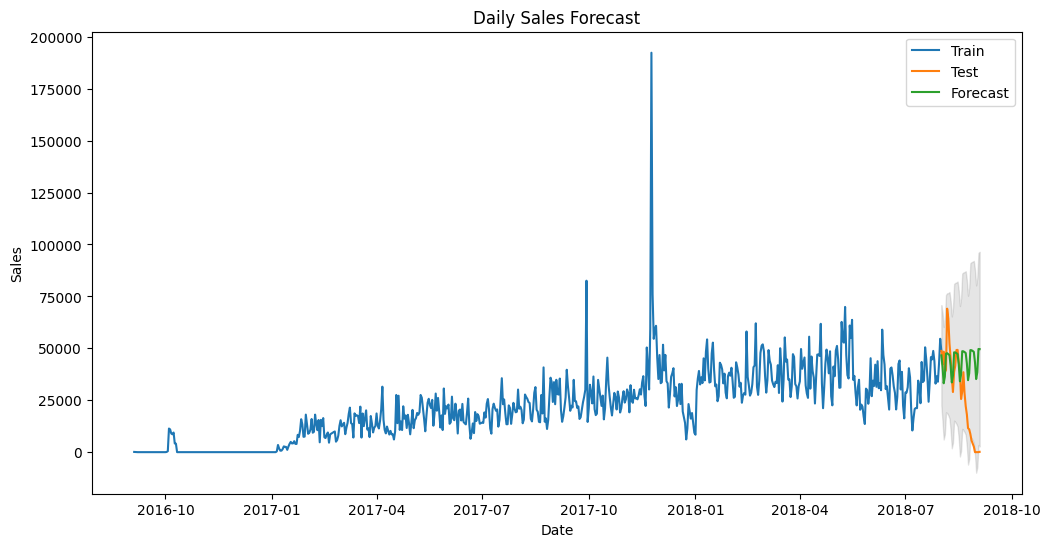

In [37]:
#SARIMAX
data['order_purchase_day'] = data['order_purchase_timestamp'].dt.to_period('D')
data['order_purchase_hour'] = data['order_purchase_timestamp'].dt.hour
data['order_purchase_weekday'] = data['order_purchase_timestamp'].dt.dayofweek
display(data.head())
#calculate daily sales
daily_sales = data.groupby('order_purchase_day')["revenue"].sum()
daily_sales.index = daily_sales.index.to_timestamp() 
daily_sales = daily_sales.resample('D').sum().fillna(0)

#train test split
train = daily_sales.loc[:'2018-08-01']
test = daily_sales.loc['2018-08-01':]

#fit SARIMAX model
model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
results = model.fit()

#predict
preds = results.get_forecast(steps=len(test))
preds_ci = preds.conf_int()

#plot
plt.figure(figsize=(12,6))
plt.plot(train.index, train.values, label='Train')
plt.plot(test.index, test.values, label='Test')
plt.plot(test.index, preds.predicted_mean, label='Forecast')
plt.fill_between(test.index, preds_ci.iloc[:, 0], preds_ci.iloc[:, 1], color='k', alpha=0.1)
plt.title('Daily Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()



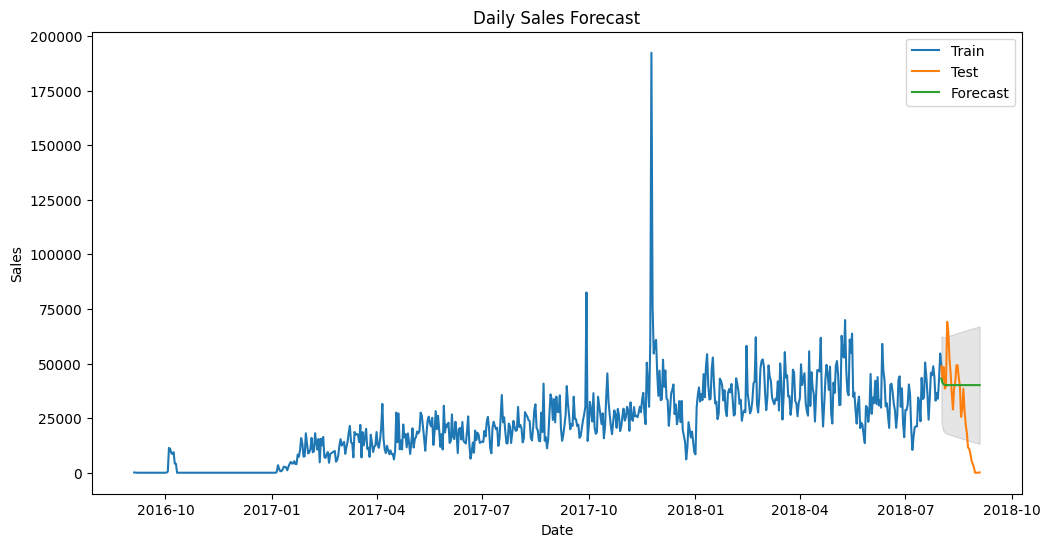

In [38]:
#ARIMA
model = ARIMA(train, order=(1, 1, 1))
results = model.fit()

#predict
preds = results.get_forecast(steps=len(test))
preds_ci = preds.conf_int()

#plot
plt.figure(figsize=(12,6))
plt.plot(train.index, train.values, label='Train')
plt.plot(test.index, test.values, label='Test')
plt.plot(test.index, preds.predicted_mean, label='Forecast')
plt.fill_between(test.index, preds_ci.iloc[:, 0], preds_ci.iloc[:, 1], color='k', alpha=0.1)
plt.title('Daily Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()

c:\Users\Volplayed\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


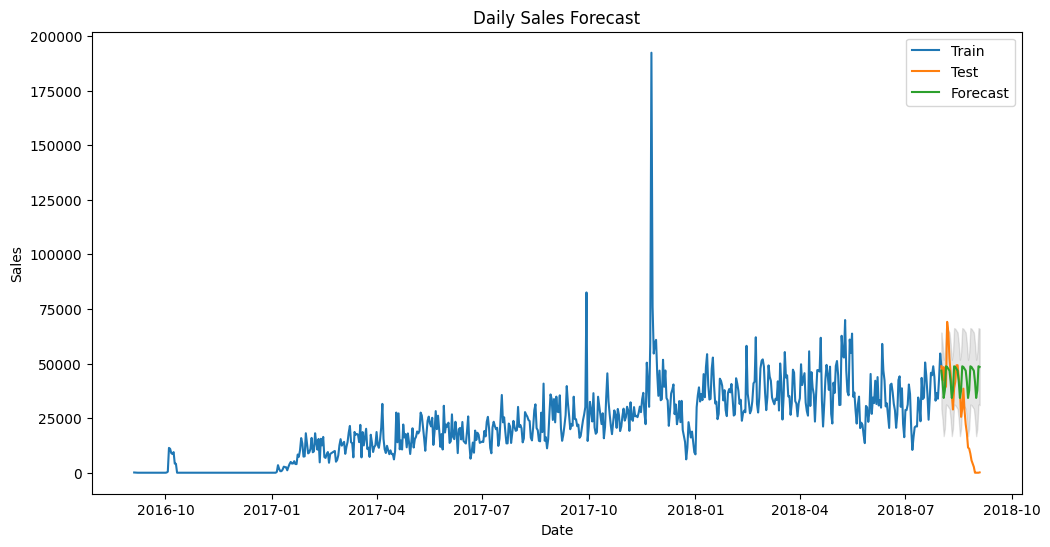

In [39]:
#Exponential Smoothing
model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=7)
results = model.fit()

#predict
preds = results.forecast(steps=len(test))
preds_std = results.resid.std()
conf_interval_upper = preds + 1.96 * preds_std
conf_interval_lower = preds - 1.96 * preds_std

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train.index, train.values, label='Train')
plt.plot(test.index, test.values, label='Test')
plt.plot(test.index, preds, label='Forecast')
plt.fill_between(test.index, conf_interval_lower, conf_interval_upper, color='k', alpha=0.1)
plt.title('Daily Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


### Machine learning model

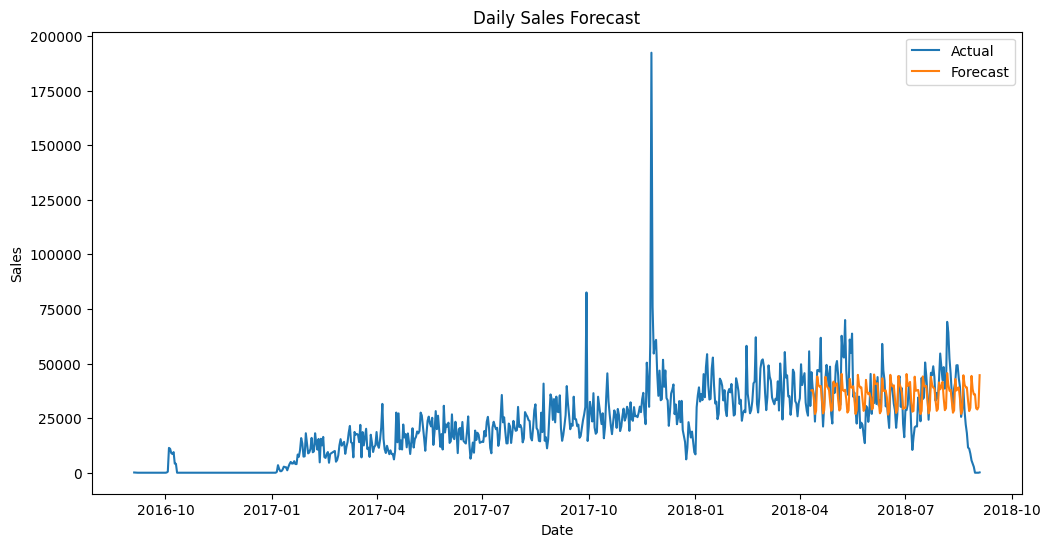

In [40]:
#Random Forest
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])
data['order_purchase_date'] = data['order_purchase_timestamp'].dt.date
data['order_purchase_month'] = data['order_purchase_timestamp'].dt.to_period('M')
data['order_purchase_day'] = data['order_purchase_timestamp'].dt.to_period('D')
data['order_purchase_hour'] = data['order_purchase_timestamp'].dt.hour
data['order_purchase_weekday'] = data['order_purchase_timestamp'].dt.dayofweek

#calculate daily sales
daily_sales = data.groupby('order_purchase_day')["revenue"].sum()
daily_sales.index = daily_sales.index.to_timestamp()
daily_sales = daily_sales.resample('D').sum().fillna(0)

#calculate features
daily_sales = daily_sales.reset_index()
daily_sales['day'] = daily_sales['order_purchase_day'].dt.day
daily_sales['month'] = daily_sales['order_purchase_day'].dt.month
daily_sales['year'] = daily_sales['order_purchase_day'].dt.year
daily_sales['weekday'] = daily_sales['order_purchase_day'].dt.dayofweek
daily_sales['quarter'] = daily_sales['order_purchase_day'].dt.quarter
daily_sales['dayofyear'] = daily_sales['order_purchase_day'].dt.dayofyear
daily_sales['is_month_start'] = daily_sales['order_purchase_day'].dt.is_month_start
daily_sales['is_month_end'] = daily_sales['order_purchase_day'].dt.is_month_end
daily_sales['is_quarter_start'] = daily_sales['order_purchase_day'].dt.is_quarter_start
daily_sales['is_quarter_end'] = daily_sales['order_purchase_day'].dt.is_quarter_end
daily_sales['is_year_start'] = daily_sales['order_purchase_day'].dt.is_year_start
daily_sales['is_year_end'] = daily_sales['order_purchase_day'].dt.is_year_end

#train test split
X = daily_sales.drop(['order_purchase_day', 'revenue'], axis=1)
y = daily_sales['revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

#fit model
model = RandomForestRegressor()
model.fit(X_train, y_train)
#predict
preds = model.predict(X_test)

def form_date(row):
    return str(row['year']) + '-' + str(row['month']) + '-' + str(row['day'])

X_test['order_purchase_day'] = pd.to_datetime(X_test.apply(form_date, axis=1)).dt.to_period('D')

#plot
plt.figure(figsize=(12,6))
plt.plot(daily_sales['order_purchase_day'], daily_sales['revenue'], label='Actual')
plt.plot(X_test['order_purchase_day'], preds, label='Forecast')
plt.title('Daily Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

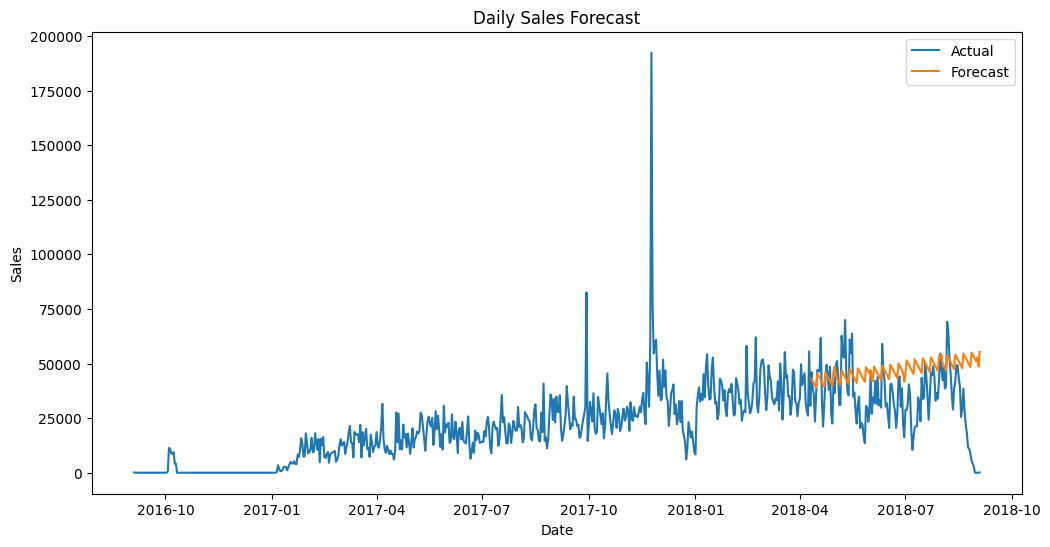

In [41]:
#Linear Regression
#train test split
X = daily_sales.drop(['order_purchase_day', 'revenue'], axis=1)
y = daily_sales['revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

#predict
preds = model.predict(X_test)

X_test['order_purchase_day'] = pd.to_datetime(X_test.apply(form_date, axis=1)).dt.to_period('D')

#plot
plt.figure(figsize=(12,6))
plt.plot(daily_sales['order_purchase_day'], daily_sales['revenue'], label='Actual')
plt.plot(X_test['order_purchase_day'], preds, label='Forecast')
plt.title('Daily Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show() 

## Future forecast

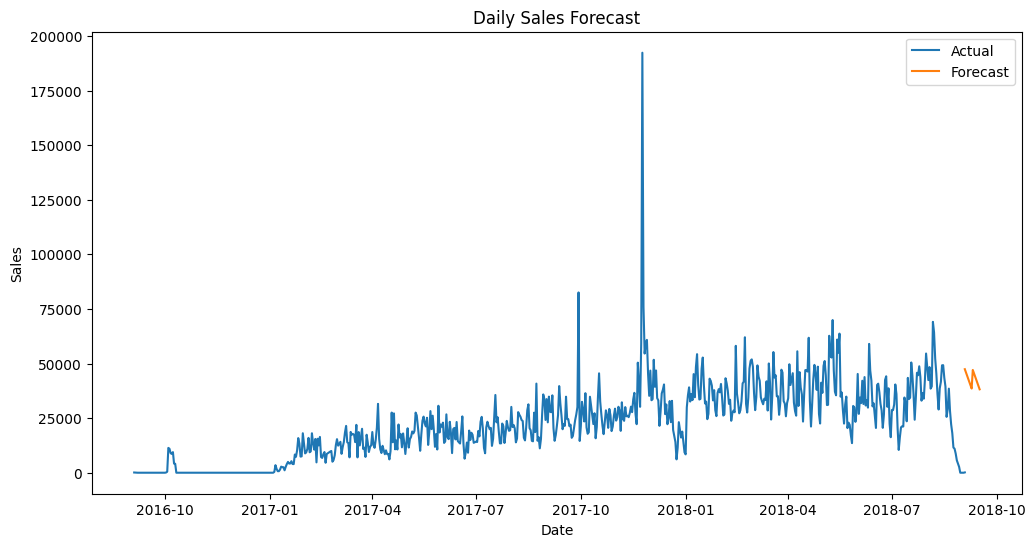

In [42]:
future_dates = pd.date_range(start=daily_sales['order_purchase_day'].max(), periods=14, freq='D')
future_dates = pd.DataFrame(future_dates, columns=['order_purchase_day'])
future_dates['day'] = future_dates['order_purchase_day'].dt.day
future_dates['month'] = future_dates['order_purchase_day'].dt.month
future_dates['year'] = future_dates['order_purchase_day'].dt.year
future_dates['weekday'] = future_dates['order_purchase_day'].dt.dayofweek
future_dates['quarter'] = future_dates['order_purchase_day'].dt.quarter
future_dates['dayofyear'] = future_dates['order_purchase_day'].dt.dayofyear
future_dates['is_month_start'] = future_dates['order_purchase_day'].dt.is_month_start
future_dates['is_month_end'] = future_dates['order_purchase_day'].dt.is_month_end
future_dates['is_quarter_start'] = future_dates['order_purchase_day'].dt.is_quarter_start
future_dates['is_quarter_end'] = future_dates['order_purchase_day'].dt.is_quarter_end
future_dates['is_year_start'] = future_dates['order_purchase_day'].dt.is_year_start
future_dates['is_year_end'] = future_dates['order_purchase_day'].dt.is_year_end

#predict
model.fit(X, y)

preds = model.predict(future_dates.drop('order_purchase_day', axis=1))

future_dates['order_purchase_day'] = pd.to_datetime(future_dates['order_purchase_day']).dt.to_period('D')

#plot
plt.figure(figsize=(12,6))
plt.plot(daily_sales['order_purchase_day'], daily_sales['revenue'], label='Actual')
plt.plot(future_dates['order_purchase_day'], preds, label='Forecast')
plt.title('Daily Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

## Choosing the best models

### Classical model

In [53]:
def get_best_classical_model():
    sales = data.groupby('order_purchase_day')["revenue"].sum()
    sales.index = sales.index.to_timestamp() 
    sales = sales.resample('D').sum().fillna(0)

    #train test split
    train = sales.loc[:'2018-08-01']
    test = sales.loc['2018-08-01':]

    #fit models
    models = {
        'SARIMAX': SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7)),
        'ARIMA': ARIMA(train, order=(1, 1, 1)),
        'Exponential Smoothing': ExponentialSmoothing(train, seasonal='add', seasonal_periods=7),
    }

    model_scores = {}

    best_model = None
    best_mse = np.inf

    for name, model in models.items():
        if name == 'Exponential Smoothing':
            results = model.fit()
            preds = results.forecast(steps=len(test))
            mse = mean_squared_error(test, preds)
        else:
            results = model.fit()
            preds = results.get_forecast(steps=len(test))
            mse = mean_squared_error(test, preds.predicted_mean)
        
        model_scores[name] = mse
    
        if mse < best_mse:
            best_mse = mse
            best_model = model
    
    #plot
    plt.figure(figsize=(12,6))
    plt.bar(model_scores.keys(), model_scores.values())
    plt.title('Model MSE')
    plt.xlabel('Model')
    plt.ylabel('MSE')
    plt.grid(axis='y')
    plt.show()

    return best_model

c:\Users\Volplayed\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


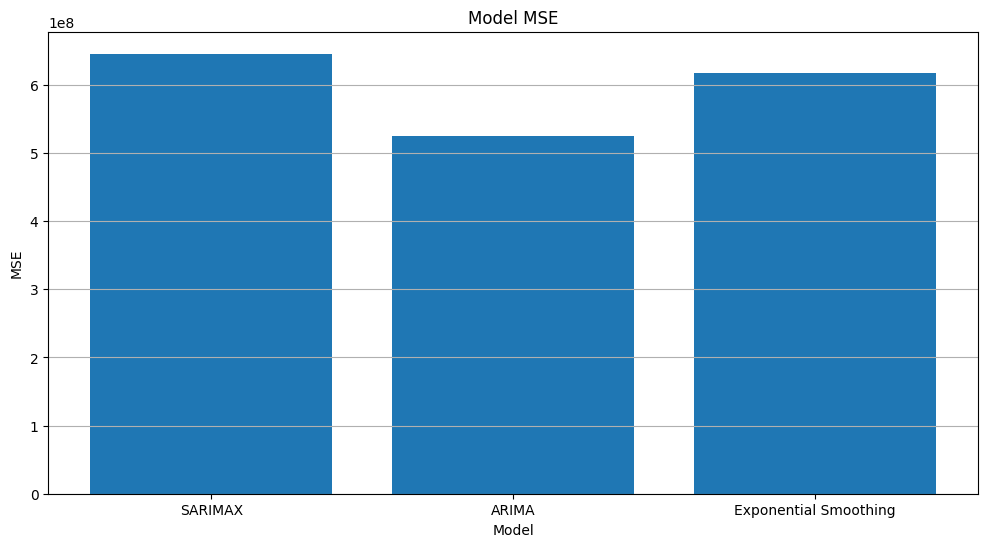

In [62]:
best_classical_model = get_best_classical_model()

The best model with the lowest MSE is the ARIMA model. So we will use it to forecast the future sales.

In [71]:
def train_best_classical_model():
    sales = data.groupby('order_purchase_day')["revenue"].sum()
    sales.index = sales.index.to_timestamp() 
    sales = sales.resample('D').sum().fillna(0)

    #fit model
    model = ARIMA(sales, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
    model.fit()

    return model

In [73]:
classical_model = train_best_classical_model()

### Machine learning model

In [56]:
def get_best_ml_model():
    sales = data.groupby('order_purchase_day')["revenue"].sum()
    sales.index = sales.index.to_timestamp() 
    sales = sales.resample('D').sum().fillna(0)

    sales = sales.reset_index()
    sales['day'] = sales['order_purchase_day'].dt.day
    sales['month'] = sales['order_purchase_day'].dt.month
    sales['year'] = sales['order_purchase_day'].dt.year
    sales['weekday'] = sales['order_purchase_day'].dt.dayofweek
    sales['quarter'] = sales['order_purchase_day'].dt.quarter
    sales['dayofyear'] = sales['order_purchase_day'].dt.dayofyear
    sales['is_month_start'] = sales['order_purchase_day'].dt.is_month_start
    sales['is_month_end'] = sales['order_purchase_day'].dt.is_month_end
    sales['is_quarter_start'] = sales['order_purchase_day'].dt.is_quarter_start
    sales['is_quarter_end'] = sales['order_purchase_day'].dt.is_quarter_end
    sales['is_year_start'] = sales['order_purchase_day'].dt.is_year_start
    sales['is_year_end'] = sales['order_purchase_day'].dt.is_year_end

    #train test split
    X = sales.drop(['order_purchase_day', 'revenue'], axis=1)
    y = sales['revenue']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    models = {
        'Random Forest': RandomForestRegressor(),
        'Linear Regression': LinearRegression(),
    }

    model_scores = {}

    best_model = None
    best_mse = np.inf

    for name, model in models.items():
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        mse = mean_squared_error(y_test, preds)
        
        model_scores[name] = mse
    
        if mse < best_mse:
            best_mse = mse
            best_model = model
    
    #plot
    plt.figure(figsize=(12,6))
    plt.bar(model_scores.keys(), model_scores.values())
    plt.title('Model MSE')
    plt.xlabel('Model')
    plt.ylabel('MSE')
    plt.grid(axis='y')
    plt.show()

    return best_model

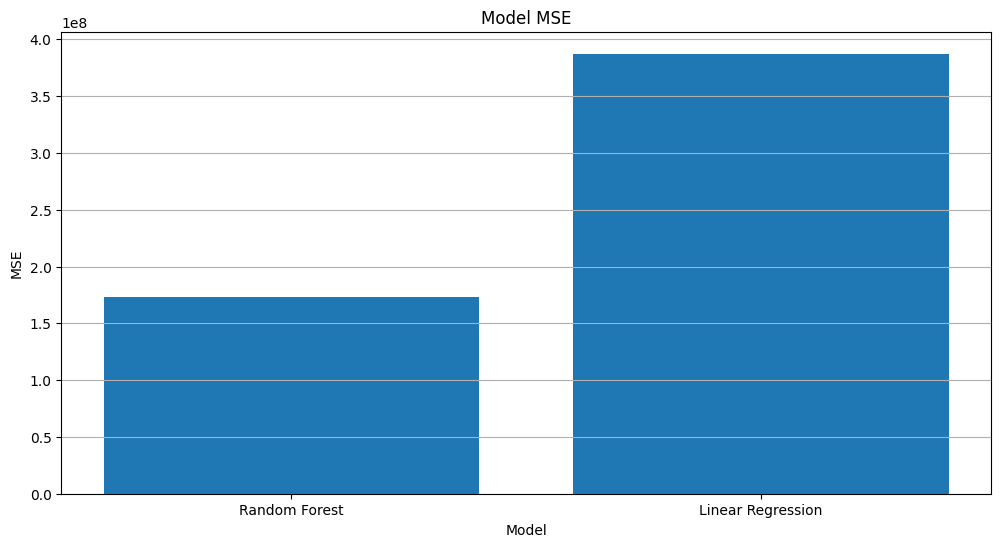

In [57]:
best_ml_model = get_best_ml_model()

The best model in this case is Random Forest Regressor. So we will use it to forecast the future sales.

In [58]:
print(best_ml_model)

RandomForestRegressor()


In [74]:
def train_best_ml_model():
    sales = data.groupby('order_purchase_day')["revenue"].sum()
    sales.index = sales.index.to_timestamp() 
    sales = sales.resample('D').sum().fillna(0)

    sales = sales.reset_index()
    sales['day'] = sales['order_purchase_day'].dt.day
    sales['month'] = sales['order_purchase_day'].dt.month
    sales['year'] = sales['order_purchase_day'].dt.year
    sales['weekday'] = sales['order_purchase_day'].dt.dayofweek
    sales['quarter'] = sales['order_purchase_day'].dt.quarter
    sales['dayofyear'] = sales['order_purchase_day'].dt.dayofyear
    sales['is_month_start'] = sales['order_purchase_day'].dt.is_month_start
    sales['is_month_end'] = sales['order_purchase_day'].dt.is_month_end
    sales['is_quarter_start'] = sales['order_purchase_day'].dt.is_quarter_start
    sales['is_quarter_end'] = sales['order_purchase_day'].dt.is_quarter_end
    sales['is_year_start'] = sales['order_purchase_day'].dt.is_year_start
    sales['is_year_end'] = sales['order_purchase_day'].dt.is_year_end

    X = sales.drop(['order_purchase_day', 'revenue'], axis=1)
    y = sales['revenue']

    model = RandomForestRegressor()
    model.fit(X, y)

    return model

In [75]:
ml_model = train_best_ml_model()

## Forecasting

In [90]:
def forecast_classical(days):
    sales = data.groupby('order_purchase_day')["revenue"].sum()
    sales.index = sales.index.to_timestamp() 
    sales = sales.resample('D').sum().fillna(0)
    future_dates = pd.date_range(start=sales.index.max(), periods=days, freq='D')
    future_dates = pd.DataFrame(future_dates, columns=['order_purchase_day'])
    

    preds = classical_model.fit().get_forecast(steps=days).predicted_mean

    future_dates['order_purchase_day'] = pd.to_datetime(future_dates['order_purchase_day']).dt.to_period('D')

    #plot
    plt.figure(figsize=(12,6))
    plt.plot(daily_sales['order_purchase_day'], daily_sales['revenue'], label='Actual')
    plt.plot(future_dates['order_purchase_day'], preds, label='Forecast')
    plt.title('Daily Sales Forecast')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()

    return future_dates, preds

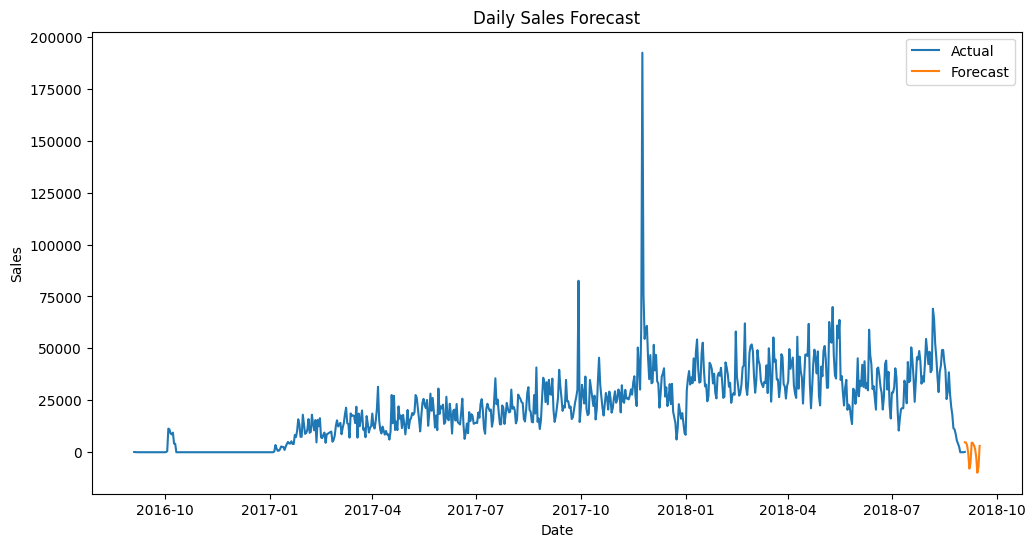

In [96]:
_, _ = forecast_classical(14)

In [112]:
def forecast_ml(days):
    sales = data.groupby('order_purchase_day')["revenue"].sum()
    sales.index = sales.index.to_timestamp() 
    sales = sales.resample('D').sum().fillna(0)

    sales = sales.reset_index()

    future_dates = pd.date_range(start=sales["order_purchase_day"].max(), periods=14, freq='D')
    future_dates = pd.DataFrame(future_dates, columns=['order_purchase_day'])
    future_dates['day'] = future_dates['order_purchase_day'].dt.day
    future_dates['month'] = future_dates['order_purchase_day'].dt.month
    future_dates['year'] = future_dates['order_purchase_day'].dt.year
    future_dates['weekday'] = future_dates['order_purchase_day'].dt.dayofweek
    future_dates['quarter'] = future_dates['order_purchase_day'].dt.quarter
    future_dates['dayofyear'] = future_dates['order_purchase_day'].dt.dayofyear
    future_dates['is_month_start'] = future_dates['order_purchase_day'].dt.is_month_start
    future_dates['is_month_end'] = future_dates['order_purchase_day'].dt.is_month_end
    future_dates['is_quarter_start'] = future_dates['order_purchase_day'].dt.is_quarter_start
    future_dates['is_quarter_end'] = future_dates['order_purchase_day'].dt.is_quarter_end
    future_dates['is_year_start'] = future_dates['order_purchase_day'].dt.is_year_start
    future_dates['is_year_end'] = future_dates['order_purchase_day'].dt.is_year_end
    
    preds = ml_model.predict(future_dates.drop('order_purchase_day', axis=1))

    #plot
    plt.figure(figsize=(12,6))
    plt.plot(daily_sales['order_purchase_day'], daily_sales['revenue'], label='Actual')
    plt.plot(future_dates['order_purchase_day'], preds, label='Forecast')
    plt.title('Daily Sales Forecast')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()

    return future_dates, preds

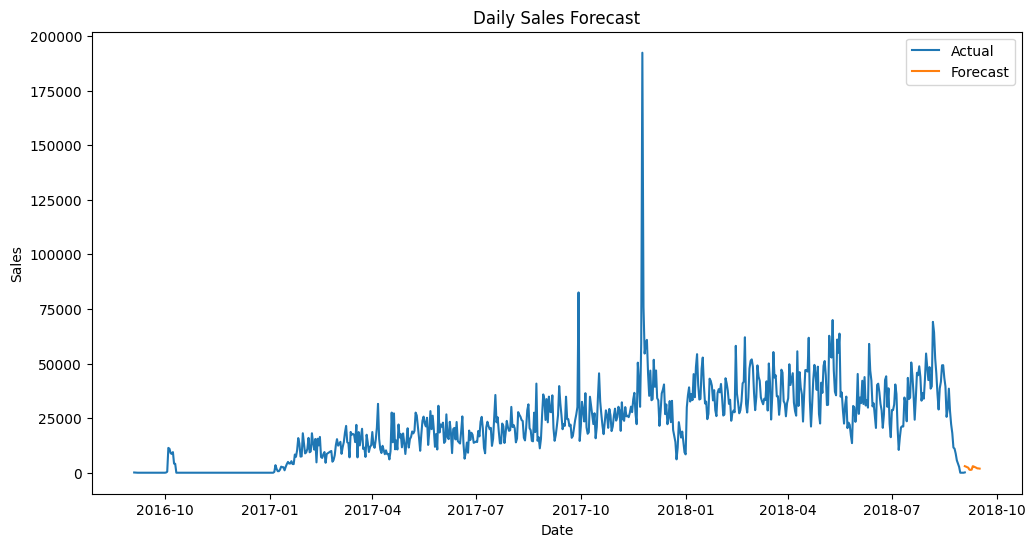

In [113]:
_, _ = forecast_ml(14)